In [6]:
!pip install pymysql

     ---------------------------------------- 43.7/43.7 kB 2.1 MB/s eta 0:00:00


In [89]:
import pandas as pd 
import numpy as np
import pymysql
import matplotlib.pyplot as plt
import datetime

In [98]:
conn = pymysql.connect(
    host="localhost",
    port=3306,
    user="root",
    password="1234",
    database="formula_one"
)

cursor = conn.cursor()

In [99]:
# Qual o top 10 de pilotos mais jovens na formula 1?
cursor.execute("""SELECT *, FLOOR(DATEDIFF(NOW(), dob)/365) as age
                FROM drivers 
                ORDER BY dob DESC
                LIMIT 10;""")
resultadoPrimeiraPergunta = cursor.fetchall()
primeiraPergunta = pd.DataFrame(resultadoPrimeiraPergunta, columns=[desc[0] for desc in cursor.description])

display(primeiraPergunta)

,driverId,forename,surname,dob,nationality,age
0,67,SÃ©bastien,Buemi,1988-10-31,Swiss,34
1,20,Sebastian,Vettel,1987-07-03,German,35
2,12,Nelson,Piquet Jr.,1985-07-25,Brazilian,37
3,3,Nico,Rosberg,1985-06-27,German,37
4,6,Kazuki,Nakajima,1985-01-11,Japanese,38
5,1,Lewis,Hamilton,1985-01-07,British,38
6,9,Robert,Kubica,1984-12-07,Polish,38
7,32,Christian,Klien,1983-02-07,Austrian,40
8,26,Scott,Speed,1983-01-24,American,40
9,16,Adrian,Sutil,1983-01-11,German,40


In [101]:
# Pilotos e suas vitórias na formula 1
cursor.execute("""SELECT r.driverId, d.surname, count(*) as numero_de_vitorias
                    from results r
                    inner join drivers d
                    on r.driverId = d.driverId
                    where position = 1
                    GROUP BY r.driverId, d.surname
                    ORDER BY numero_de_vitorias DESC""")
resultadoSegundaPergunta = cursor.fetchall()
segundaPergunta = pd.DataFrame(resultadoSegundaPergunta, columns=[desc[0] for desc in cursor.description])

display(segundaPergunta)

,driverId,surname,numero_de_vitorias
0,1,Hamilton,103
1,20,Vettel,53
2,4,Alonso,31
3,3,Rosberg,23
4,30,Schumacher,21
5,8,RÃ¤ikkÃ¶nen,20
6,18,Button,15
7,13,Massa,11
8,17,Webber,9
9,31,Pablo Montoya,4


In [102]:
# Qual é a distribuição do número de corridas por país na história da Formula 1?
cursor.execute("""SELECT c.country, COUNT(DISTINCT r.raceId) AS num_races
                FROM circuits c
                INNER JOIN races ra ON c.circuitId = ra.circuitId
                INNER JOIN results r ON ra.raceId = r.raceId
                GROUP BY c.country
                ORDER BY num_races DESC;""")
resultadoTerceiraPergunta = cursor.fetchall()
terceiraPergunta = pd.DataFrame(resultadoTerceiraPergunta, columns=[desc[0] for desc in cursor.description])

display(terceiraPergunta)

,country,num_races
0,Italy,26
1,Spain,24
2,UK,20
3,Bahrain,19
4,Hungary,19
5,Brazil,18
6,Germany,18
7,Monaco,18
8,Australia,17
9,Belgium,17


In [103]:
# Qual a distribuição do número de vitórias por equipe na história da Fórmula 1?
cursor.execute("""SELECT c.name, SUM(cs.wins) AS total_wins
                FROM constructors c
                JOIN constructor_standings cs ON c.constructorId = cs.constructorId
                GROUP BY c.name
                HAVING total_wins > 0
                ORDER BY total_wins DESC;""")
resultadoQuartaPergunta = cursor.fetchall()
quartaPergunta = pd.DataFrame(resultadoQuartaPergunta, columns=[desc[0] for desc in cursor.description])

display(quartaPergunta)

,name,total_wins
0,Ferrari,1923
1,McLaren,1604
2,Mercedes,1207
3,Williams,934
4,Red Bull,898
5,Team Lotus,374
6,Renault,352
7,Benetton,220
8,Brabham,179
9,Tyrrell,166


In [104]:
# Qual é a relação entre o tempo de volta de um piloto e a posição final no circuito de interlagos?
cursor.execute("""SELECT r.driverId, l.time, r.position
                FROM results r
                INNER JOIN (
                  SELECT raceId, driverId, MIN(time) AS time
                  FROM lap_times
                  GROUP BY raceId, driverId
                ) l ON r.raceId = l.raceId AND r.driverId = l.driverId
                WHERE r.position <= 10 AND r.raceId = 69
                ORDER BY r.position ASC;""")
resultadoQuintaPergunta = cursor.fetchall()
quintaPergunta = pd.DataFrame(resultadoQuintaPergunta, columns=[desc[0] for desc in cursor.description])

display(quintaPergunta)

,driverId,time,position
0,4,1:32.676,1
1,13,1:33.296,2
2,21,1:33.564,3
3,18,1:33.451,4
4,8,1:33.344,5
5,15,1:33.866,6
6,23,1:33.607,7
7,2,1:34.525,8
8,9,1:33.509,9
9,3,1:34.802,10


# Exibição dos dados através de boxplot, gráfico de barras, histogramas e scatter

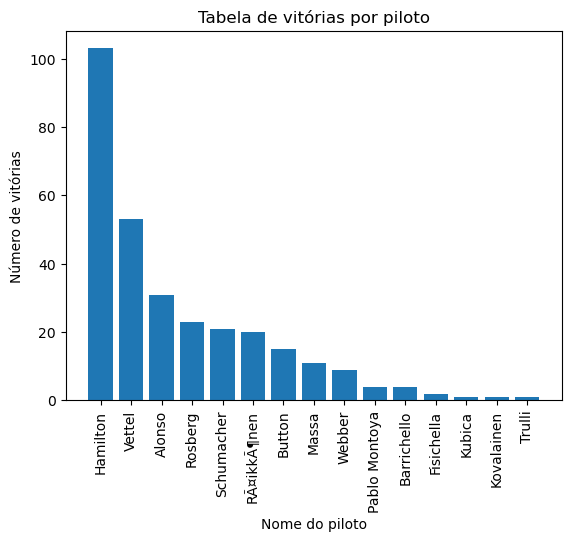

In [4]:
plt.bar(segundaPergunta['surname'], segundaPergunta['numero_de_vitorias'])
plt.xticks(rotation=90)
plt.xlabel('Nome do piloto')
plt.ylabel('Número de vitórias')
plt.title('Tabela de vitórias por piloto')
plt.show()

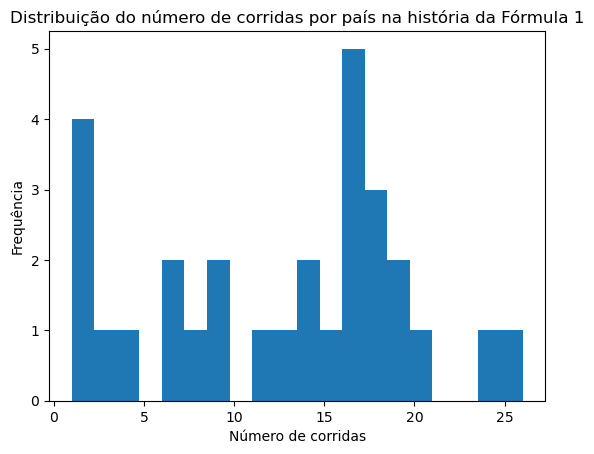

In [54]:
plt.hist(terceiraPergunta['num_races'], bins=20)
plt.xlabel('Número de corridas')
plt.ylabel('Frequência')
plt.title('Distribuição do número de corridas por país na história da Fórmula 1')
plt.show()

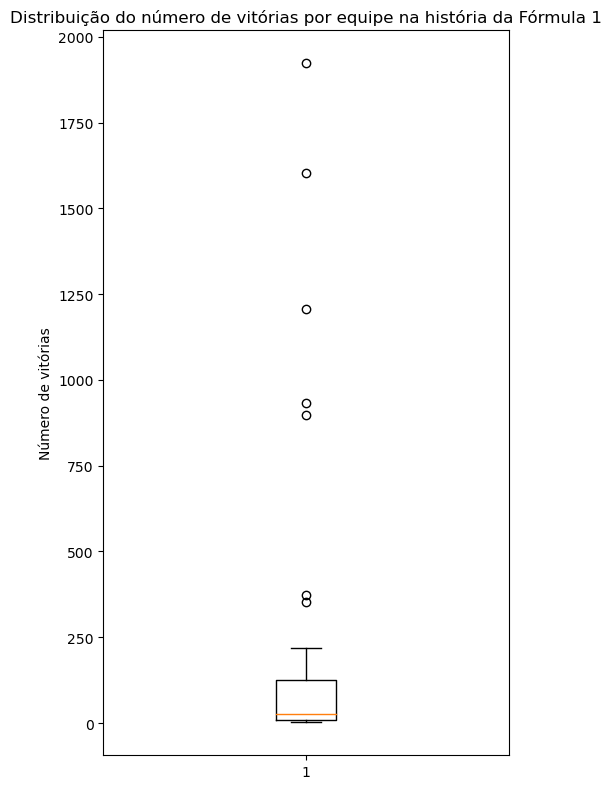

In [87]:
fig, ax = plt.subplots(figsize=(5, 8))
ax.boxplot([float(x) for x in quartaPergunta['total_wins']])
ax.set_title('Distribuição do número de vitórias por equipe na história da Fórmula 1')
ax.set_ylabel('Número de vitórias')
plt.tight_layout()
plt.show()

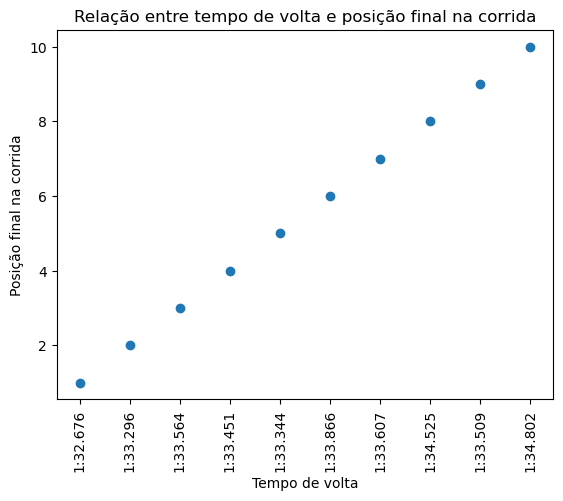

In [84]:
plt.scatter(quintaPergunta['time'], sextaPergunta['position'])
plt.xticks(rotation=90)
plt.xlabel('Tempo de volta')
plt.ylabel('Posição final na corrida')
plt.title('Relação entre tempo de volta e posição final na corrida')
plt.show()

In [ ]:
cursor.close()
conn.close()